Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Dataset

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data #Viewing the data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Analysing the dataset

In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Checking for missing values

In [8]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
data['Car_Name'].nunique()

98

Visualising columns

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Fuel_Type'>

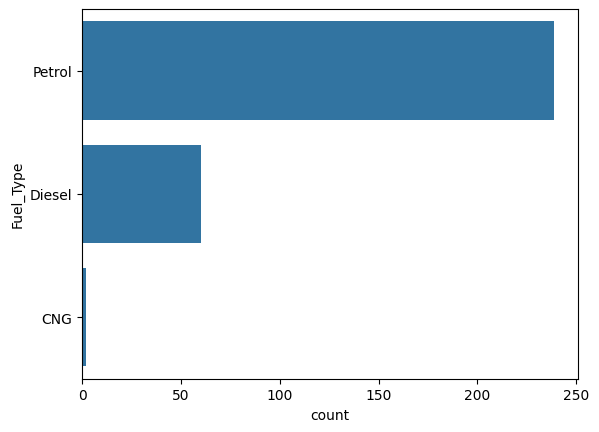

In [10]:
print(data['Fuel_Type'].value_counts())
import seaborn as sns
sns.countplot(data['Fuel_Type']) #countplot for Fuel_type column

<Axes: xlabel='count', ylabel='Seller_Type'>

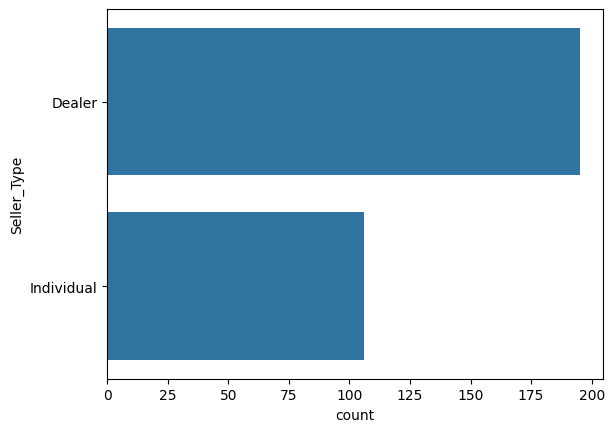

In [11]:
data['Seller_Type'].value_counts()
sns.countplot(data['Seller_Type']) #Count plot for Seller_Type column

<Axes: xlabel='count', ylabel='Transmission'>

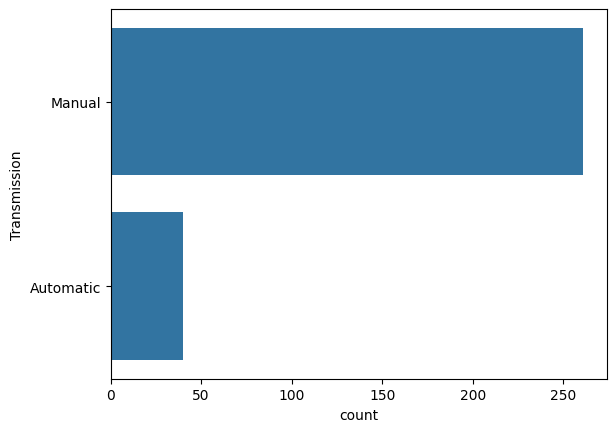

In [12]:
data['Transmission'].value_counts()
sns.countplot(data['Transmission']) #Count plot for Transmission column

Encoding categorical variables

In [13]:
data.replace({ 'Fuel_Type': {'Petrol': 0, 'Diesel' : 1, 'CNG': 2},
               'Transmission': {'Manual': 0, 'Automatic': 1},
               'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace = True) #Encoding categorical columns into numerical values

<ipython-input-13-10a53639fe96>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({ 'Fuel_Type': {'Petrol': 0, 'Diesel' : 1, 'CNG': 2},


In [14]:
data #viewing the encoded columns

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting Independent and dependent variables

In [15]:
x = data.drop(['Selling_Price', 'Car_Name'],axis=1)
y = data['Selling_Price']

In [16]:
x # Viewing x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [17]:
y # Viewing y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


Splitting the Dataset into train and test sets

In [18]:
num = 'Year Present_Price Kms_Driven'.split() #Creating a list of numerical columns

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,2008,0.750,26000,0,1,0,1
132,2017,0.950,3500,0,1,0,0
194,2008,0.787,50000,0,1,0,0
75,2015,6.800,36000,0,0,0,0
111,2016,1.500,8700,0,1,0,0
...,...,...,...,...,...,...,...
188,2013,0.570,18000,0,1,0,0
71,2011,12.480,45000,1,0,0,0
106,2014,3.450,16500,0,1,0,1
270,2011,10.000,69341,0,0,0,0


Feature scaling

In [21]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,2016,0.57,24000,0,1,1,0
289,2016,13.60,10980,0,0,0,0
228,2012,9.40,60000,1,0,0,0
198,2011,0.57,35000,0,1,0,1
60,2013,18.61,40001,0,0,0,0
...,...,...,...,...,...,...,...
234,2015,5.70,4492,0,0,0,0
296,2016,11.60,33988,1,0,0,0
281,2006,7.60,50456,0,0,0,0
285,2016,8.50,15059,0,0,1,0


In [22]:
y_train

,Selling_Price
184,0.25
132,0.75
194,0.20
75,3.95
111,1.15
...,...
188,0.25
71,4.50
106,1.35
270,4.10


In [23]:
y_test

,Selling_Price
177,0.35
289,10.11
228,4.95
198,0.15
60,6.95
...,...
234,5.50
296,9.50
281,2.10
285,7.40


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[num] = scaler.fit_transform(x_train[num])
x_test[num] = scaler.transform(x_test[num])
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [25]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,0.357143,0.004660,0.051051,0,1,0,1
132,1.000000,0.006827,0.006006,0,1,0,0
194,0.357143,0.005061,0.099099,0,1,0,0
75,0.857143,0.070221,0.071071,0,0,0,0
111,0.928571,0.012787,0.016416,0,1,0,0
...,...,...,...,...,...,...,...
188,0.714286,0.002709,0.035035,0,1,0,0
71,0.571429,0.131773,0.089089,1,0,0,0
106,0.785714,0.033919,0.032032,0,1,0,1
270,0.571429,0.104898,0.137820,0,0,0,0


In [26]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,0.928571,0.002709,0.047047,0,1,1,0
289,0.928571,0.143910,0.020981,0,0,0,0
228,0.642857,0.098396,0.119119,1,0,0,0
198,0.571429,0.002709,0.069069,0,1,0,1
60,0.714286,0.198201,0.079081,0,0,0,0
...,...,...,...,...,...,...,...
234,0.857143,0.058301,0.007992,0,0,0,0
296,0.928571,0.122237,0.067043,1,0,0,0
281,0.214286,0.078890,0.100012,0,0,0,0
285,0.928571,0.088643,0.029147,0,0,1,0


Training the dataset with Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluating the model

In [30]:
train_pred = model.predict(x_train) #for training set

In [31]:
train_pred

array([[-7.25107020e-02],
       [ 5.36715042e-02],
       [-4.94384793e-02],
       [ 1.34972455e-01],
       [ 4.93711122e-02],
       [ 5.76178978e-01],
       [ 5.19313593e-01],
       [ 1.54307162e-01],
       [-2.20978311e-02],
       [ 1.28894244e-01],
       [ 1.53245985e-01],
       [ 1.60421908e-01],
       [ 1.40186918e-01],
       [ 7.57651649e-02],
       [ 4.39905683e-02],
       [ 5.20498874e-02],
       [ 2.86201068e-01],
       [ 1.99573173e-02],
       [ 2.22919490e-01],
       [ 1.27000750e-01],
       [ 9.38590907e-02],
       [ 1.27422623e-01],
       [ 4.12721165e-01],
       [ 6.28285907e-02],
       [ 8.54436975e-02],
       [ 2.36734218e-02],
       [ 9.68998554e-02],
       [ 3.00434437e-02],
       [ 4.80380650e-01],
       [ 3.72737336e-02],
       [ 2.37671245e-03],
       [ 2.59875759e-01],
       [ 2.32526081e-01],
       [ 1.20776915e-01],
       [-7.64083068e-02],
       [ 1.17267287e-01],
       [ 1.72634814e-01],
       [ 1.22879697e-01],
       [-9.4

In [32]:
test_pred = model.predict(x_test) #for test set

In [33]:
test_pred

array([[ 0.08214053],
       [ 0.23503033],
       [ 0.17066497],
       [-0.04493266],
       [ 0.2623822 ],
       [ 0.19863341],
       [ 0.03586386],
       [ 0.0208272 ],
       [ 0.03643929],
       [ 0.20078593],
       [ 0.24767412],
       [ 0.01392932],
       [ 0.24078716],
       [ 0.09535919],
       [ 0.18343375],
       [ 0.08558779],
       [ 0.01040798],
       [ 0.30933971],
       [ 0.0477042 ],
       [ 0.06496752],
       [ 0.00789073],
       [ 0.2186957 ],
       [ 0.17500081],
       [ 0.07298645],
       [ 0.01955074],
       [ 0.10374609],
       [ 0.14996959],
       [ 0.07845961],
       [ 0.05905163],
       [ 0.04791424],
       [ 0.00798265],
       [ 0.24901967],
       [-0.02294275],
       [ 0.06300521],
       [ 0.23252608],
       [ 0.12723128],
       [ 0.20782868],
       [ 0.21726005],
       [ 0.08073587],
       [ 0.22867646],
       [ 0.11165314],
       [ 0.12168264],
       [ 0.12217424],
       [ 0.0146186 ],
       [ 0.19612577],
       [ 0

Evaluating using metrics

In [36]:
# for training set prediction
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_train, train_pred))
print(mean_absolute_error(y_train, train_pred))
print(mean_squared_error(y_train, train_pred))

0.8839793496750794
0.03369936245346764
0.002518242482638727


In [37]:
# for test set prediction
print(r2_score(y_test, test_pred))
print(mean_absolute_error(y_test, test_pred))
print(mean_squared_error(y_test, test_pred))

0.8468053957657414
0.03500749416141198
0.0028972892290627145


In [ ]:
y.mean()

4.661295681063123

Comparing the predicted data with actual data through visualisation

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

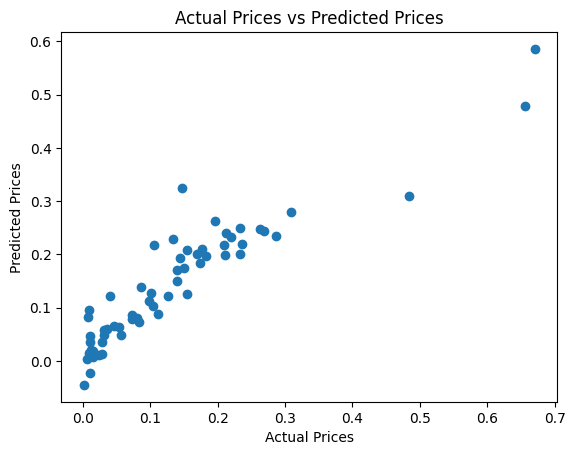

In [38]:
plt.scatter(y_test, test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

The model's performance is pretty good 🥰